In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('UCI_Credit_Card.csv')

# Exploratory Data Analysis
### Data Understanding + Cleansing + Feature selection and pretreatment


In [6]:
"""
ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)
"""
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


###### 1. Our target here is based on the given data, we are going to build up a model for default prediction of credit card owners and it's a binary classification problem.
###### 2. This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [9]:
for col in df.columns:
  print(col, len(df[col].unique()), df[col].unique())

"""
Categorical columns: 'SEX', 'EDUCATION', 'MARRIAGE'
Numeric columns: 'LIMIT_BAL','AGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
          'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
Redundant column: ID
Labeled y(Categorical): default.payment.next.month

"""


ID 30000 [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL 81 [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
SEX 2 [2 1]
EDUCATION 7 [2 1 3 5 4 6 0]
MARRIAGE 4 [1 2 3 0]
AGE 56 [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73

"\nCategorical columns: 'SEX', 'EDUCATION', 'MARRIAGE'\nNumeric columns: 'LIMIT_BAL','AGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',\n          'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',\n          'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'\nRedundant column: ID\nLabeled y(Categorical): default.payment.next.month\n\n"

It seems like there is no missing value and the content in every column are reasonable.

In [10]:
#details of numberical columns
df[['LIMIT_BAL','AGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
          'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0


In [11]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

Remove ID, and check out duplicate rows

In [12]:
#Drop ID
df.drop(['ID'],axis=1,inplace=True)

In [13]:
condition = df.duplicated() #return duplicate
df[condition]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1980,150000.0,2,1,1,38,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4585,150000.0,2,1,1,31,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6022,210000.0,2,1,2,39,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6466,210000.0,2,2,1,49,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7319,500000.0,1,1,1,43,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8320,360000.0,1,2,1,41,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10250,50000.0,1,2,2,26,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13106,360000.0,2,1,1,49,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14294,20000.0,1,2,2,24,2,2,4,4,4,...,1650.0,1650.0,1650.0,0.0,0.0,0.0,0.0,0.0,0.0,1
15458,160000.0,1,2,2,28,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [14]:
df[(df['LIMIT_BAL'] == 150000.0) & (df['SEX'] == 2) & (df['AGE'] == 38) & (df['EDUCATION']==1)].head(2).T #return duplicate
# 2 credit card owners having same personal information and repayment pattern. Can we consider them as duplicate data?
# Even if it's duplicate, do they affect the training process? I think few of them is acceptable.
# Decide not to filter out duplicates here.

,1964,1980
LIMIT_BAL,150000.0,150000.0
SEX,2.0,2.0
EDUCATION,1.0,1.0
MARRIAGE,1.0,1.0
AGE,38.0,38.0
PAY_0,1.0,1.0
PAY_2,-2.0,-2.0
PAY_3,-2.0,-2.0
PAY_4,-2.0,-2.0
PAY_5,-2.0,-2.0


In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

##### Visualization of categorical columns

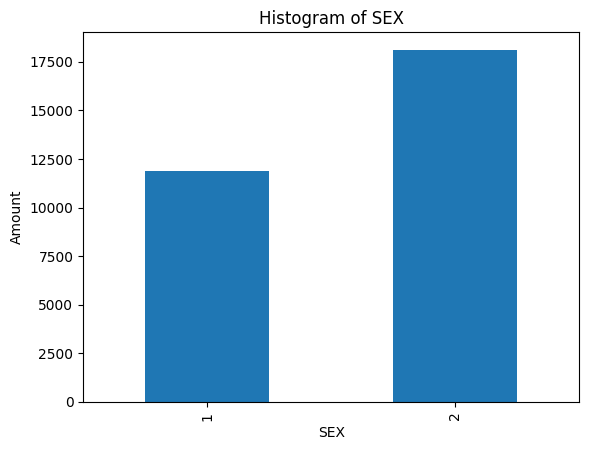

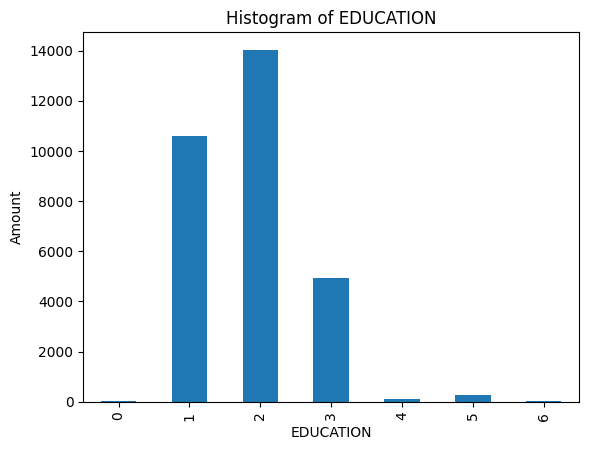

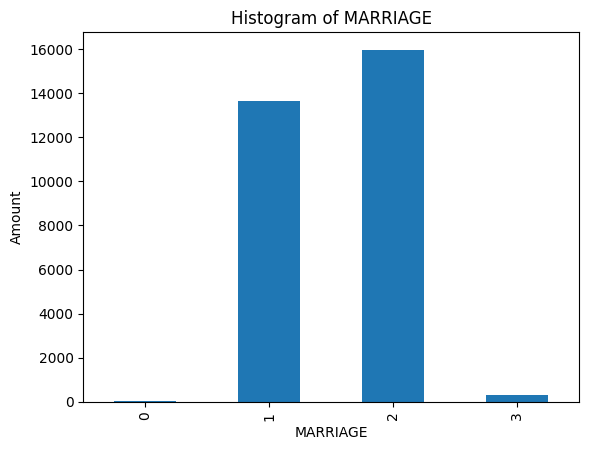

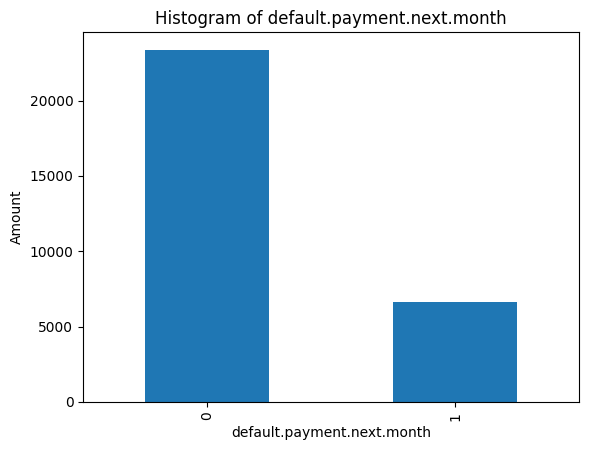

'\nSEX: Gender (1=male, 2=female)\nEDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)\nMARRIAGE: Marital status (1=married, 2=single, 3=others)\n'

In [16]:

categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE','default.payment.next.month']

# Plot histograms
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().sort_index(ascending=True).plot(kind='bar')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Amount')
    plt.show()
"""
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
"""
# our model may highly focus on highly educated groups (education 1,2,3)
# Sex and marriage seem balanced
# Is the objective default.payment.next.month unbalanced? will it affect the trainning process?


##### Visualization of numerical columns

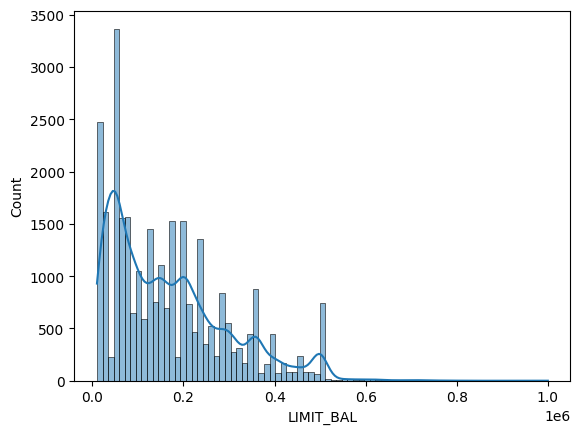

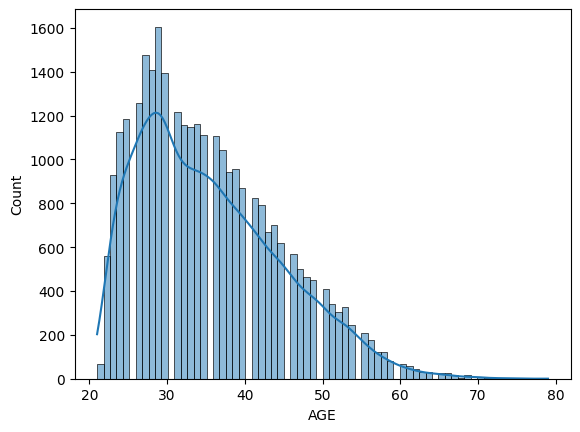

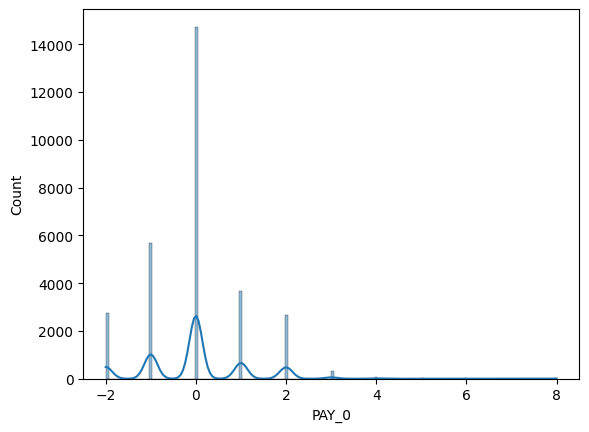

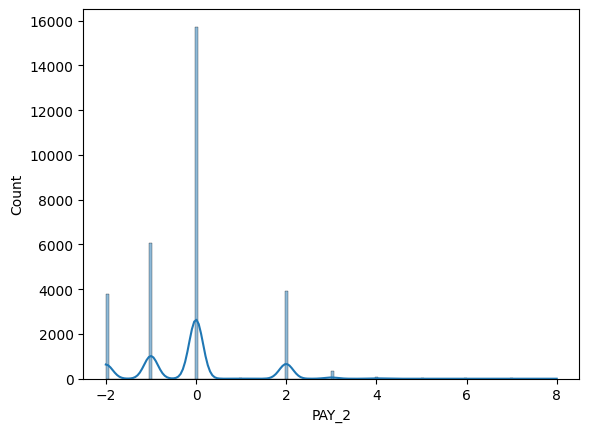

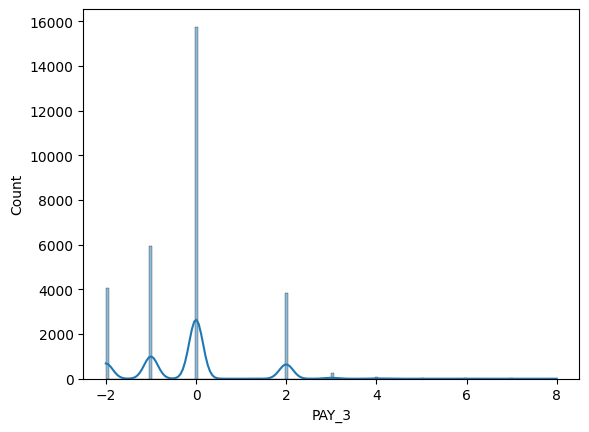

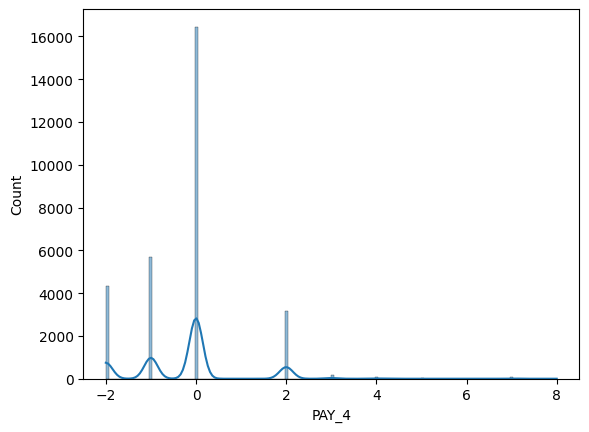

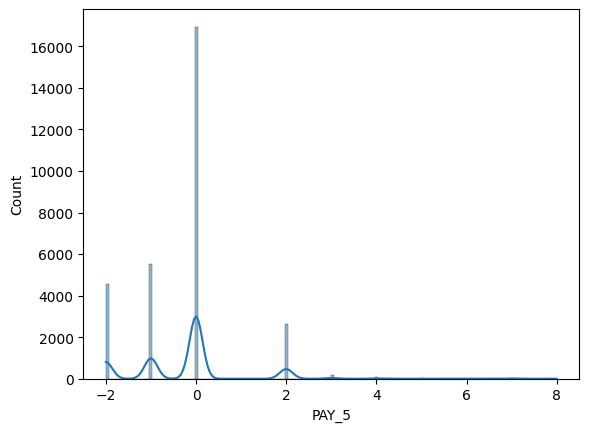

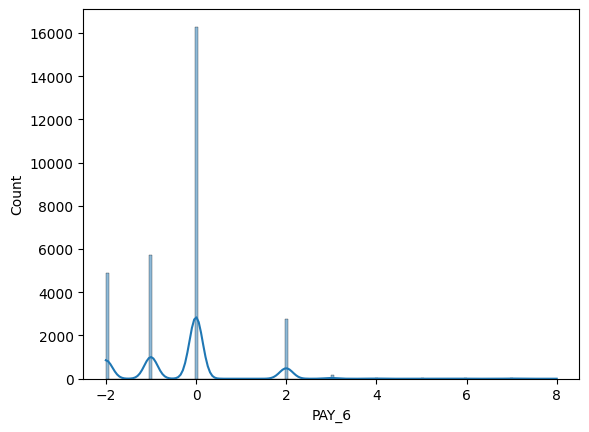

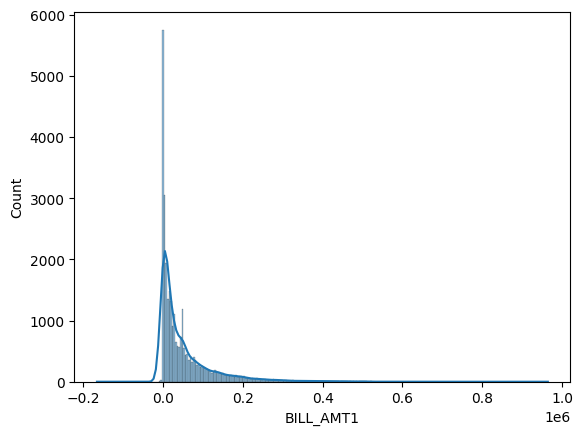

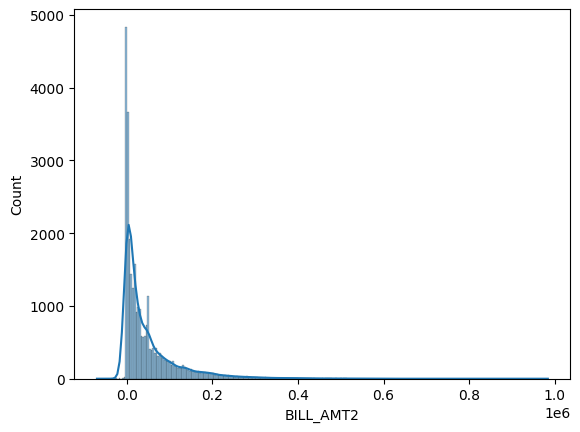

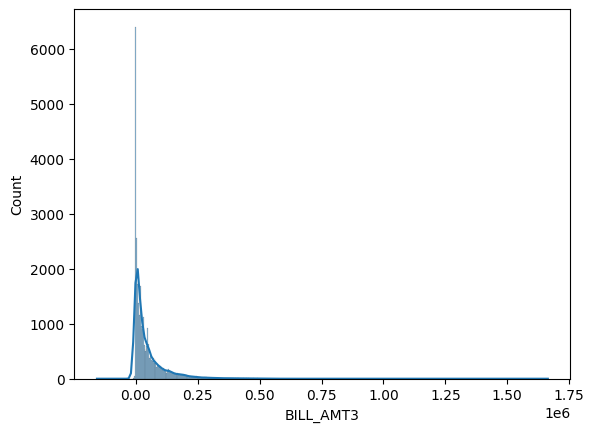

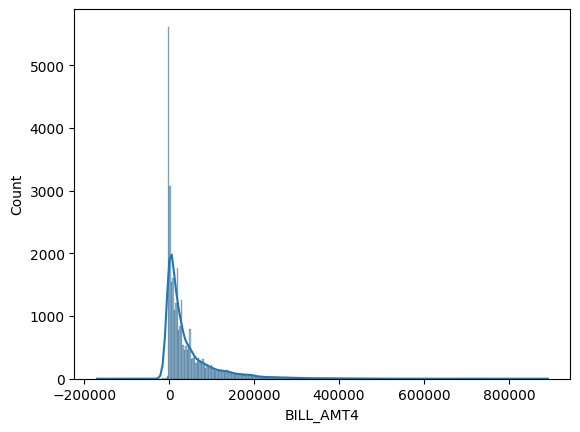

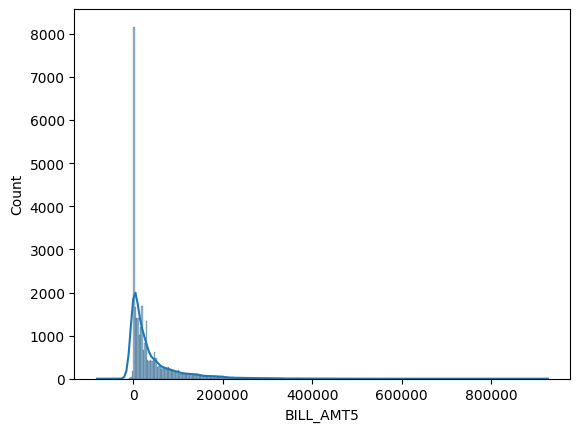

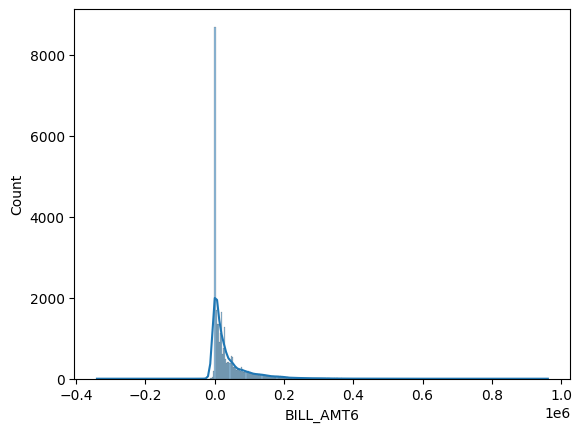

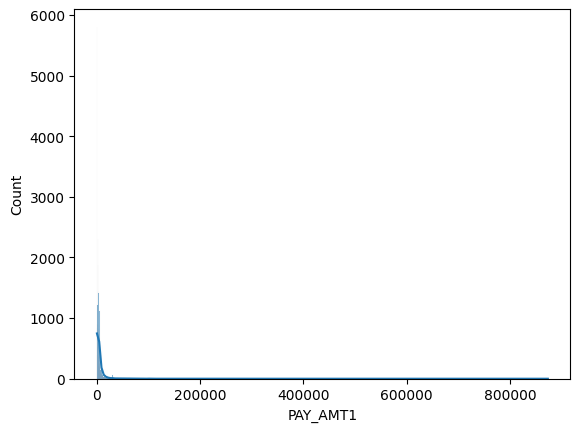

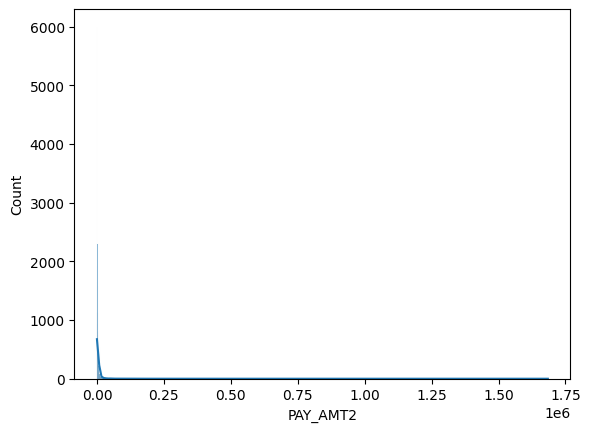

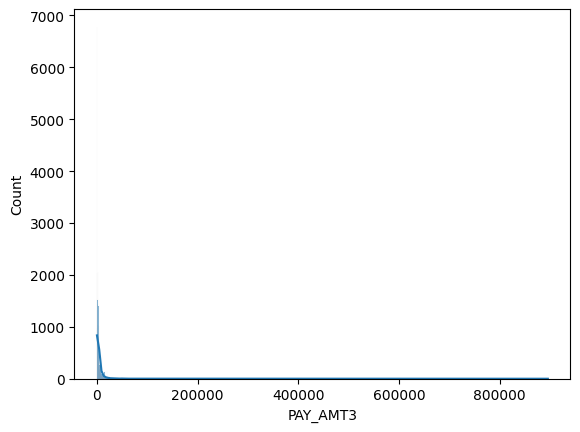

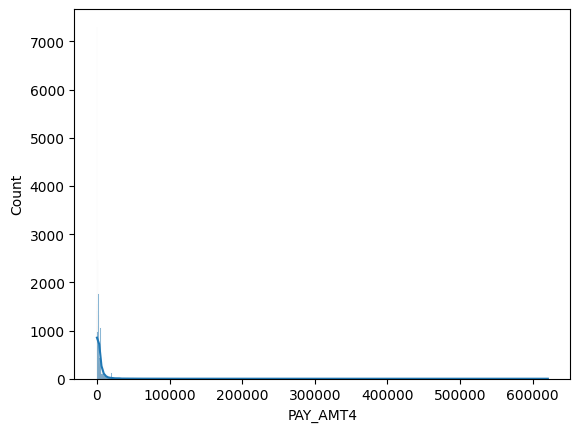

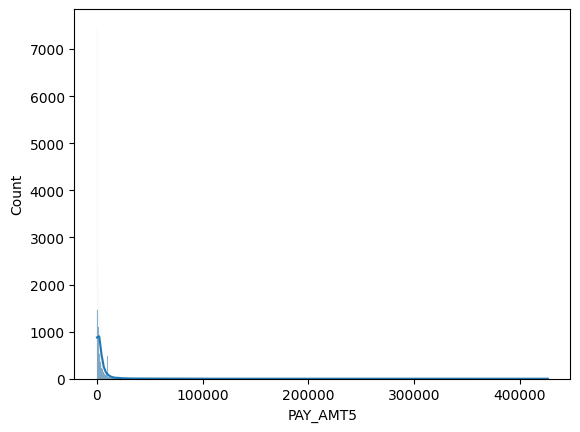

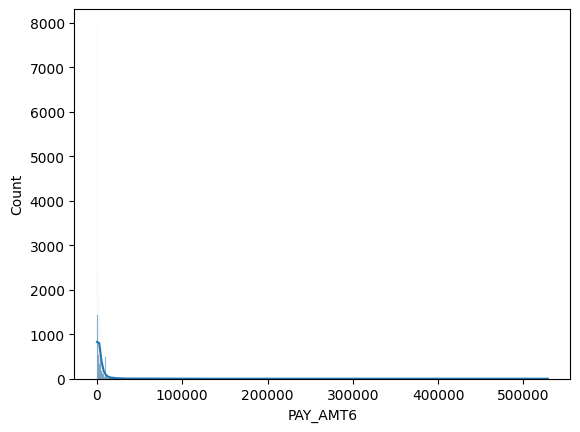

'\nAGE: Age in years\nPAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)\nPAY_2: Repayment status in August, 2005 (scale same as above)\nPAY_3: Repayment status in July, 2005 (scale same as above)\nPAY_4: Repayment status in June, 2005 (scale same as above)\nPAY_5: Repayment status in May, 2005 (scale same as above)\nPAY_6: Repayment status in April, 2005 (scale same as above)\nBILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)\nBILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)\nBILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)\nBILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)\nBILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)\nBILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)\nPAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)\nPAY_AMT2: Amount 

In [17]:
numeric_cols = ['LIMIT_BAL','AGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
          'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Plot histograms
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.show()


"""
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
"""

# LIMIT_BAL, BILL_AMT, PAY_AMT are right skewed. Applying log transformation can help to reduce nonlinearity and boost the training process. Also, it can compensate for the imbalance of head and tail.
# Age distribution can be considered normal with slightly few datasets under 25
# There is no clustering effect in the distribution of listed column
# Usually, the default notice is sent by the card issuer after 6 consecutive missed payments.
# BILL_AMT1，PAY_0 have some negative values: A negative bill means that you've overpaid your balance or if you've had a credit returned to your account.
# Both BILL_AMT，PAY_AMT are right skewed which is reasonable due to the right skewness of LIMIT_BAL

In [18]:
"""
Convert NTD to USD (1:30) and Apply log transformation. Normaliztion will be done in the later section.
Applying log transformation can help to reduce nonlinearity and boost the training process. Also, it can compensate for the imbalance of head and tail.
reference: https://math.stackexchange.com/questions/3245046/advantage-of-inputs-targets-to-be-normally-distributed
"""

columnsLogTransform = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
             'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df[columnsLogTransform] = df[columnsLogTransform].apply(lambda x: np.log(x/30)).replace(-np.inf, 0)
df.head()

c:\Users\Ryan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Ryan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,6.502290,2,2,1,24,2,2,-1,-1,-2,...,0.000000,0.000000,0.000000,0.000000,3.134044,0.000000,0.000000,0.000000,0.000000,1
1,8.294050,2,2,2,26,-1,2,0,0,0,...,4.691959,4.746380,4.688592,0.000000,3.506558,3.506558,3.506558,0.000000,4.199705,1
2,8.006368,2,2,2,34,0,0,0,0,0,...,6.168983,6.211135,6.250554,3.923952,3.912023,3.506558,3.506558,3.506558,5.115996,0
3,7.418581,2,2,1,37,0,0,0,0,0,...,6.849914,6.872439,6.892540,4.199705,4.209160,3.688879,3.601868,3.573282,3.506558,0
4,7.418581,1,2,1,57,-1,0,-1,0,0,...,6.548219,6.458652,6.457868,4.199705,7.108817,5.809143,5.703782,3.134044,3.119424,0


<Axes: >

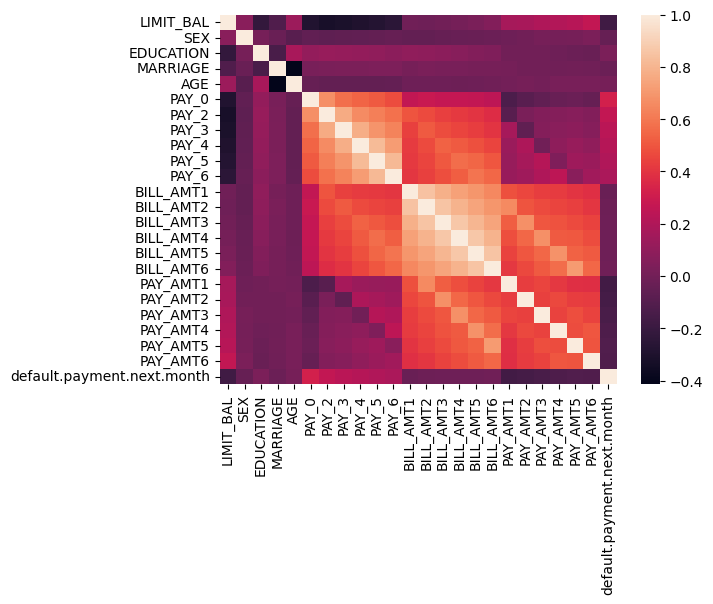

In [19]:
"""
Check out the correlation between features
1. If we have strong correlation(muticolinearity) between features,a small change in one variable can lead to a siginificant amount of swing in the model output. It may hinder the training process.
2. It's not necessary to remove the colinear columns. I think it just depends on whether there is a pattern underneath colinear columns that help the task or not.
3. Remove colinearity columns and leave the most important one may improve the accuracy of the model. (do it later)
reference: https://medium.com/analytics-vidhya/correlation-and-machine-learning-fee0ffc5faac
      https://www.kaggle.com/code/fegadeharish/eda-and-logistic-regression

"""

sns.heatmap(df.corr())

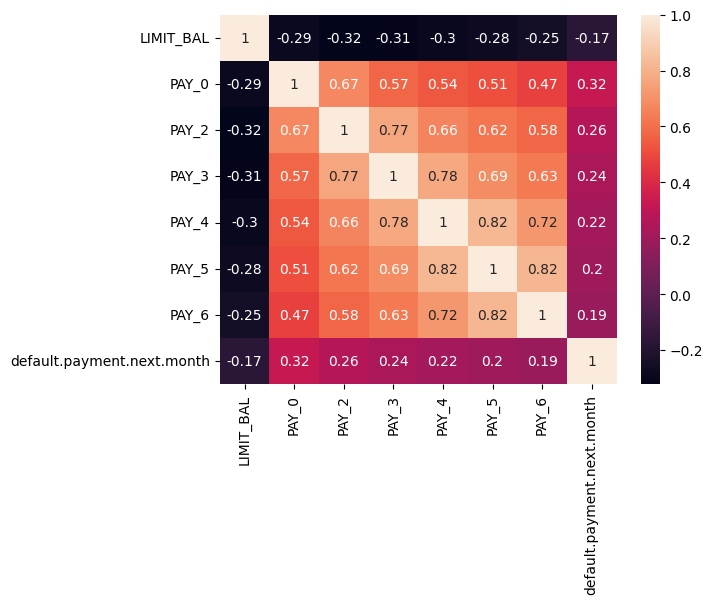

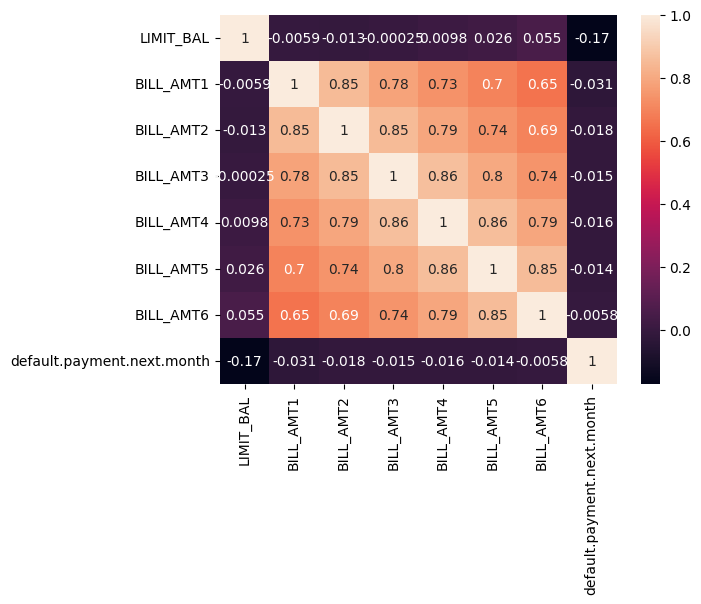

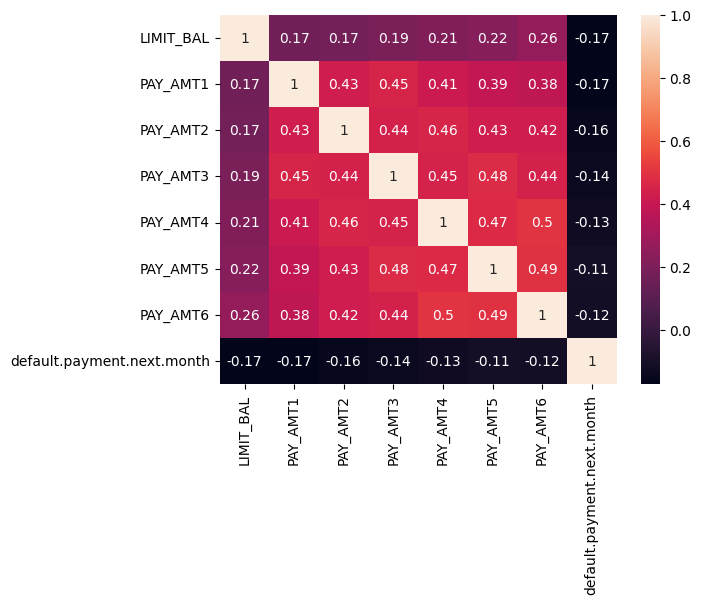

In [20]:
#Focus on the relationship between independent variables(features) and the dependent variable(output)

limitbal_pay_default = ['LIMIT_BAL','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default.payment.next.month']
limitbal_bill_default = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','default.payment.next.month']
limitbal_payamt_default = ['LIMIT_BAL','PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default.payment.next.month']
heatmaps = [limitbal_pay_default, limitbal_bill_default, limitbal_payamt_default]

for cols in heatmaps:
  plt.figure()
  sns.heatmap(df[cols].corr(), annot=True)
  plt.show()

#It seems that PAY_0~6 have strong colinearity. The closer the stronger. Furthermore, the correlations between default and PAY_0~6 are relatively strong comparing to BILL_AMT and PAY_AMT
#BILL_AMT and PAY_AMT 0~6 also have strong colinearity but the correlations between default is relative small
#Will dive into whether remove colinear columns after model is ready.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   29410 non-null  float64
 12  BILL_AMT2                   29331 non-null  float64
 13  BILL_AMT3                   293

In [28]:
#Convert categorical columns into type categories and make them in the form of one hot coding.
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
df[categorical_cols] = df[categorical_cols].astype('category')

df_EDA = pd.get_dummies(df).fillna(0)
df_EDA.to_csv('CreditCard_EDA.csv', index=False)

pd.get_dummies(df).head().T
# Is the dataset becoming too sparse?

,0,1,2,3,4
LIMIT_BAL,6.502290,8.294050,8.006368,7.418581,7.418581
AGE,24.000000,26.000000,34.000000,37.000000,57.000000
PAY_0,2.000000,-1.000000,0.000000,0.000000,-1.000000
PAY_2,2.000000,2.000000,0.000000,0.000000,0.000000
PAY_3,-1.000000,0.000000,0.000000,0.000000,-1.000000
PAY_4,-1.000000,0.000000,0.000000,0.000000,0.000000
PAY_5,-2.000000,0.000000,0.000000,0.000000,0.000000
PAY_6,-2.000000,2.000000,0.000000,0.000000,0.000000
BILL_AMT1,4.870862,4.493121,6.882061,7.356493,5.660295
BILL_AMT2,4.638605,4.051785,6.147542,7.382601,5.241747
